In [1]:
import requests
import pandas as pd
% matplotlib inline
import json
from bs4 import BeautifulSoup
import re
import time
import glob
import os
import numpy as np
import time

# CSV with custom/curated list of US news companies and their Twitter handles

In [34]:
twitter_handles = pd.read_csv('News-Sites-Twitter-Handles_Curated.csv')
twitter_handles = twitter_handles[:26]
twitter_handles.head(7)

,medium,twitter_acc,search_term,web_url
0,The New York Times,http://twitter.com/nytimes,nytimes,nytimes.com
1,Washington Post,http://twitter.com/washingtonpost,washingtonpost,washingtonpost.com
2,USA Today,http://twitter.com/usatoday,usatoday,usatoday.com
3,Wall Street Journal,https://twitter.com/wsj,wsj,wsj.com
4,LA Times,http://twitter.com/latimes,latimes,latimes.com
5,New York Daily News,https://twitter.com/nydailynews,nydailynews,nydailynews.com
6,New York Post,https://twitter.com/nypost,nypost,nypost.com


# After tweets data mining JSON

In [378]:
tweets = pd.read_json('Media-Tweets-All_v01-Raw.json')
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,35,The New York Times,1,18,http://nyti.ms/2wlqUdT,2:41 PM - 22 Aug 2017,900110599841087488,https://twitter.com/nytimes/status/90011059984...,Missouri governor grants stay of execution for...,1503438064000,http://twitter.com/nytimes
1,588,The New York Times,76,252,http://nyti.ms/2wjeeUT,2:26 PM - 22 Aug 2017,900106827903500288,https://twitter.com/nytimes/status/90010682790...,Authorities have issued warrants for Christoph...,1503437165000,http://twitter.com/nytimes
2,85,The New York Times,89,83,None,1:58 PM - 22 Aug 2017,900099914864115712,https://twitter.com/viaSimonRomero/status/9000...,On the street in downtown Phoenix where people...,1503435517000,http://twitter.com/nytimes
3,305,The New York Times,62,127,http://nyti.ms/2v3JTd3,2:14 PM - 22 Aug 2017,900103891060224000,https://twitter.com/nytimes/status/90010389106...,The relationship between Trump and McConnell h...,1503436465000,http://twitter.com/nytimes
4,1258,The New York Times,279,793,http://nyti.ms/2v3JTd3,2:09 PM - 22 Aug 2017,900102754160521216,https://twitter.com/nytimes/status/90010275416...,"Breaking News: Mitch McConnell, the Senate lea...",1503436194000,http://twitter.com/nytimes
5,118,The New York Times,3,29,http://nyti.ms/2vbA5tM,2:00 PM - 22 Aug 2017,900100371007369216,https://twitter.com/nytimes/status/90010037100...,Chrissie vs. Martina. Steffi vs. Monica. Venus...,1503435626000,http://twitter.com/nytimes
6,196,The New York Times,58,184,http://nyti.ms/2vbjztK,1:45 PM - 22 Aug 2017,900096505658454016,https://twitter.com/nytimes/status/90009650565...,Climate change is wreaking havoc with Italy's ...,1503434704000,http://twitter.com/nytimes
7,108,The New York Times,4,46,http://nyti.ms/2wB7IbW,1:30 PM - 22 Aug 2017,900092815086153728,https://twitter.com/nytimes/status/90009281508...,"Go around the world in 7 markets, from Marrake...",1503433824000,http://twitter.com/nytimes
8,93,The New York Times,45,27,http://nyti.ms/2wBkMy5,1:15 PM - 22 Aug 2017,900088954707476480,https://twitter.com/nytimes/status/90008895470...,President Trump's former childhood house is li...,1503432904000,http://twitter.com/nytimes
9,37,The New York Times,3,15,http://nyti.ms/2v2Vn0o,1:00 PM - 22 Aug 2017,900085288286003200,https://twitter.com/nytimes/status/90008528828...,"The Grill is packed with ideas, historical all...",1503432030000,http://twitter.com/nytimes


#### Create pd.datetime

In [379]:
tweets['tweet_datetime_from_datetime'] = pd.to_datetime(tweets['tweet_datetime'], format='%I:%M %p - %d %b %Y')
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
0,35,The New York Times,1,18,http://nyti.ms/2wlqUdT,2:41 PM - 22 Aug 2017,900110599841087488,https://twitter.com/nytimes/status/90011059984...,Missouri governor grants stay of execution for...,1503438064000,http://twitter.com/nytimes,2017-08-22 14:41:00
1,588,The New York Times,76,252,http://nyti.ms/2wjeeUT,2:26 PM - 22 Aug 2017,900106827903500288,https://twitter.com/nytimes/status/90010682790...,Authorities have issued warrants for Christoph...,1503437165000,http://twitter.com/nytimes,2017-08-22 14:26:00
2,85,The New York Times,89,83,None,1:58 PM - 22 Aug 2017,900099914864115712,https://twitter.com/viaSimonRomero/status/9000...,On the street in downtown Phoenix where people...,1503435517000,http://twitter.com/nytimes,2017-08-22 13:58:00
3,305,The New York Times,62,127,http://nyti.ms/2v3JTd3,2:14 PM - 22 Aug 2017,900103891060224000,https://twitter.com/nytimes/status/90010389106...,The relationship between Trump and McConnell h...,1503436465000,http://twitter.com/nytimes,2017-08-22 14:14:00
4,1258,The New York Times,279,793,http://nyti.ms/2v3JTd3,2:09 PM - 22 Aug 2017,900102754160521216,https://twitter.com/nytimes/status/90010275416...,"Breaking News: Mitch McConnell, the Senate lea...",1503436194000,http://twitter.com/nytimes,2017-08-22 14:09:00
5,118,The New York Times,3,29,http://nyti.ms/2vbA5tM,2:00 PM - 22 Aug 2017,900100371007369216,https://twitter.com/nytimes/status/90010037100...,Chrissie vs. Martina. Steffi vs. Monica. Venus...,1503435626000,http://twitter.com/nytimes,2017-08-22 14:00:00
6,196,The New York Times,58,184,http://nyti.ms/2vbjztK,1:45 PM - 22 Aug 2017,900096505658454016,https://twitter.com/nytimes/status/90009650565...,Climate change is wreaking havoc with Italy's ...,1503434704000,http://twitter.com/nytimes,2017-08-22 13:45:00
7,108,The New York Times,4,46,http://nyti.ms/2wB7IbW,1:30 PM - 22 Aug 2017,900092815086153728,https://twitter.com/nytimes/status/90009281508...,"Go around the world in 7 markets, from Marrake...",1503433824000,http://twitter.com/nytimes,2017-08-22 13:30:00
8,93,The New York Times,45,27,http://nyti.ms/2wBkMy5,1:15 PM - 22 Aug 2017,900088954707476480,https://twitter.com/nytimes/status/90008895470...,President Trump's former childhood house is li...,1503432904000,http://twitter.com/nytimes,2017-08-22 13:15:00
9,37,The New York Times,3,15,http://nyti.ms/2v2Vn0o,1:00 PM - 22 Aug 2017,900085288286003200,https://twitter.com/nytimes/status/90008528828...,"The Grill is packed with ideas, historical all...",1503432030000,http://twitter.com/nytimes,2017-08-22 13:00:00


#### Sort by datetime and medium, and keep only between Tue15 - Mon21
15338 rows from 19591

In [380]:
tweets.sort_values(by=['medium', 'tweet_datetime_from_datetime'], inplace=True)
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10152,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,2017-08-15 06:38:00
10151,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,2017-08-15 06:58:00
10150,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,2017-08-15 07:15:00
10149,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,2017-08-15 07:37:00
10148,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,2017-08-15 07:54:00
10147,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2017-08-15 08:05:00
10146,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,2017-08-15 08:25:00
10145,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,2017-08-15 08:49:00
10144,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,2017-08-15 08:50:00
10143,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,2017-08-15 09:19:00


In [381]:
tweets = tweets[tweets.tweet_datetime_from_datetime > '2017-08-15']
tweets = tweets[tweets.tweet_datetime_from_datetime < '2017-08-22']
tweets[tweets.medium=='Washington Post']

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
1620,5553,Washington Post,406,4229,http://wapo.st/2wbFqVR?tid=ss_tw&utm_term=.c88...,4:19 PM - 16 Aug 2017,897961089836691456,https://twitter.com/myhlee/status/897961089836...,NEW: 4 Pincchios to President Trump's false cl...,1502925581000,http://twitter.com/washingtonpost,2017-08-16 16:19:00
1619,961,Washington Post,139,266,http://wapo.st/2w31W30,4:25 PM - 16 Aug 2017,897962427526074368,https://twitter.com/washingtonpost/status/8979...,Opinion: Robert E. Lee is worth remembering. J...,1502925900000,http://twitter.com/washingtonpost,2017-08-16 16:25:00
1618,530,Washington Post,281,136,http://wapo.st/2uQEEcK,4:40 PM - 16 Aug 2017,897966283509161984,https://twitter.com/washingtonpost/status/8979...,Opinion: Is the Confederacy finally about to d...,1502926820000,http://twitter.com/washingtonpost,2017-08-16 16:40:00
1617,292,Washington Post,61,429,http://wapo.st/2w2RkkH,4:43 PM - 16 Aug 2017,897966961484869632,https://twitter.com/washingtonpost/status/8979...,"After clashes with white nationalists, U-Va. l...",1502926981000,http://twitter.com/washingtonpost,2017-08-16 16:43:00
1616,58,Washington Post,11,28,http://wapo.st/2vJB4SZ,4:58 PM - 16 Aug 2017,897970967393316864,https://twitter.com/washingtonpost/status/8979...,D.C.’s vaunted high school for the arts reopen...,1502927936000,http://twitter.com/washingtonpost,2017-08-16 16:58:00
1615,111,Washington Post,37,61,http://wapo.st/2uQV8lc,5:13 PM - 16 Aug 2017,897974510732836864,https://twitter.com/washingtonpost/status/8979...,"Perspective: Elvis Presley died 40 years ago, ...",1502928781000,http://twitter.com/washingtonpost,2017-08-16 17:13:00
1614,628,Washington Post,201,423,http://wapo.st/2fMCY1l,5:21 PM - 16 Aug 2017,897976533368938496,https://twitter.com/washingtonpost/status/8979...,President Trump’s remarks after the violence i...,1502929263000,http://twitter.com/washingtonpost,2017-08-16 17:21:00
1613,428,Washington Post,16,155,http://wapo.st/2w2WfSG,5:39 PM - 16 Aug 2017,897981232520232960,https://twitter.com/washingtonpost/status/8979...,Detroit Lions join Red Wings in condemning use...,1502930384000,http://twitter.com/washingtonpost,2017-08-16 17:39:00
1612,173,Washington Post,52,195,http://wapo.st/2fNhTDG,5:40 PM - 16 Aug 2017,897981343732297728,https://twitter.com/washingtonpost/status/8979...,"A U.S. service member is killed, others wounde...",1502930410000,http://twitter.com/washingtonpost,2017-08-16 17:40:00
1611,775,Washington Post,341,406,http://wapo.st/2w3mNTD,5:43 PM - 16 Aug 2017,897982070030553088,https://twitter.com/washingtonpost/status/8979...,President Trump’s lack of discipline leaves ne...,1502930583000,http://twitter.com/washingtonpost,2017-08-16 17:43:00


#### Control for ? in bitly slug
329 rows

In [382]:
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10152,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,2017-08-15 06:38:00
10151,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,2017-08-15 06:58:00
10150,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,2017-08-15 07:15:00
10149,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,2017-08-15 07:37:00
10148,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,2017-08-15 07:54:00
10147,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2017-08-15 08:05:00
10146,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,2017-08-15 08:25:00
10145,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,2017-08-15 08:49:00
10144,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,2017-08-15 08:50:00
10143,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,2017-08-15 09:19:00


In [383]:
tweets[tweets.tweet_bitly.str.contains('\?', na=False)]

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10030,762,ABC News,103,223,http://abcnews.go.com/live?stream=7,7:12 AM - 16 Aug 2017,897823412508397568,https://twitter.com/ABC/status/897823412508397568,LIVE NOW: Two plaques honoring Confederate Gen...,1502892756000,http://twitter.com/abc,2017-08-16 07:12:00
12801,143,Associated Press,11,70,http://wapo.st/2uZ7DLm?tid=ss_tw-amp,10:24 PM - 19 Aug 2017,899139982996062208,https://twitter.com/asnowreports/status/899139...,Can’t find the protective glasses to watch the...,1503206651000,https://twitter.com/ap,2017-08-19 22:24:00
5742,12,Boston Globe,6,7,http://www.bostonglobe.com/sports/redsox/2017/...,4:57 AM - 20 Aug 2017,899238851289501696,https://twitter.com/GlobeKPD/status/8992388512...,Second Thought: UFC and eSports — are they fad...,1503230223000,https://twitter.com/bostonglobe,2017-08-20 04:57:00
5473,19,Boston Globe,0,4,http://www.bostonglobe.com/arts/2017/08/21/bon...,4:44 PM - 21 Aug 2017,899779286026133504,https://twitter.com/BostonGlobe/status/8997792...,"Watch video of Bonnie Tyler performing ""Total ...",1503359073000,https://twitter.com/bostonglobe,2017-08-21 16:44:00
15509,516,BuzzFeed,11,239,https://www.buzzfeed.com/blakemontgomery/heres...,6:15 PM - 15 Aug 2017,897627723002253312,https://twitter.com/BuzzFeedNews/status/897627...,If you’re confused about what happened in Char...,1502846100000,http://twitter.com/BuzzFeed,2017-08-15 18:15:00
15494,332,BuzzFeed,13,43,https://www.buzzfeed.com/lyapalater/hes-vapin-...,8:20 AM - 16 Aug 2017,897840617660829696,https://twitter.com/BuzzFeed/status/8978406176...,He's Vapin' In The Rain\nhttps://www.buzzfeed....,1502896858000,http://twitter.com/BuzzFeed,2017-08-16 08:20:00
15484,569,BuzzFeed,20,120,https://www.buzzfeed.com/venessawong/major-cor...,10:10 AM - 16 Aug 2017,897868303124791296,https://twitter.com/BuzzFeedNews/status/897868...,CEOs that have left Trump’s manufacturing coun...,1502903459000,http://twitter.com/BuzzFeed,2017-08-16 10:10:00
15453,892,BuzzFeed,31,355,https://www.buzzfeed.com/charliewarzel/read-ap...,8:02 PM - 16 Aug 2017,898017093269938176,https://twitter.com/BuzzFeedNews/status/898017...,NEW: Read Apple CEO Tim Cook's email to employ...,1502938934000,http://twitter.com/BuzzFeed,2017-08-16 20:02:00
15452,1242,BuzzFeed,16,277,https://www.buzzfeed.com/buzzfeednews/dc-polit...,9:00 PM - 16 Aug 2017,898031766211936256,https://twitter.com/BuzzFeedNews/status/898031...,Thousands of people marched in a candlelight v...,1502942432000,http://twitter.com/BuzzFeed,2017-08-16 21:00:00
15442,881,BuzzFeed,15,242,https://www.buzzfeed.com/buzzfeednews/dc-polit...,5:30 AM - 17 Aug 2017,898160078758584320,https://twitter.com/BuzzFeedNews/status/898160...,"Thousands of people sang ""This Little Light of...",1502973024000,http://twitter.com/BuzzFeed,2017-08-17 05:30:00


In [384]:
tweets['tweet_bitly'] = tweets.tweet_bitly.replace('\?.*', '', regex=True)
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10152,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,2017-08-15 06:38:00
10151,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,2017-08-15 06:58:00
10150,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,2017-08-15 07:15:00
10149,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,2017-08-15 07:37:00
10148,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,2017-08-15 07:54:00
10147,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2017-08-15 08:05:00
10146,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,2017-08-15 08:25:00
10145,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,2017-08-15 08:49:00
10144,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,2017-08-15 08:50:00
10143,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,2017-08-15 09:19:00


In [385]:
tweets[tweets.tweet_bitly.str.contains('\?', na=False)]

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime


#### Control for duplicates in all of `tweet_id`,   `datetime`,   `bitly`
15331 rows from 15338

In [386]:
tweets = tweets.drop_duplicates(subset=['tweet_id', 'tweet_datetime_from_datetime', 'tweet_bitly'])
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10152,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,2017-08-15 06:38:00
10151,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,2017-08-15 06:58:00
10150,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,2017-08-15 07:15:00
10149,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,2017-08-15 07:37:00
10148,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,2017-08-15 07:54:00
10147,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2017-08-15 08:05:00
10146,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,2017-08-15 08:25:00
10145,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,2017-08-15 08:49:00
10144,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,2017-08-15 08:50:00
10143,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,2017-08-15 09:19:00


### Keep only original tweets, not retweets
ie. tweets from the medium's account   
from 15,331 rows to 13,044

In [387]:
def delete_retweets(row):
    twitter_handle = row['twitter_handle'].split('://')[1]
    lower = row['tweet_permalink'].lower()
    if twitter_handle not in lower:
        return ''
    else:
        return row['twitter_handle']
        
tweets['twitter_handle'] = tweets.apply(delete_retweets, axis=1)
tweets

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10152,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,2017-08-15 06:38:00
10151,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,2017-08-15 06:58:00
10150,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,2017-08-15 07:15:00
10149,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,2017-08-15 07:37:00
10148,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,2017-08-15 07:54:00
10147,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2017-08-15 08:05:00
10146,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,2017-08-15 08:25:00
10145,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,2017-08-15 08:49:00
10144,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,2017-08-15 08:50:00
10143,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,2017-08-15 09:19:00


In [388]:
tweets = tweets[tweets.twitter_handle != '']
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_datetime_from_datetime
10152,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,2017-08-15 06:38:00
10151,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,2017-08-15 06:58:00
10150,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,2017-08-15 07:15:00
10149,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,2017-08-15 07:37:00
10148,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,2017-08-15 07:54:00
10147,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2017-08-15 08:05:00
10146,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,2017-08-15 08:25:00
10145,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,2017-08-15 08:49:00
10144,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,2017-08-15 08:50:00
10143,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,2017-08-15 09:19:00


In [389]:
tweets.to_json('Media-Tweets-All_v02-No-Duplis-Original-Tweets-Only.json', orient='records')

In [35]:
tweets = pd.read_json('Media-Tweets-All_v02-No-Duplis-Original-Tweets-Only.json')
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc
8,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,1502787000000,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc
9,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,1502788740000,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc


#### Who tweeted the most

In [391]:
tweets.groupby('medium')['medium'].count().sort_values(ascending=False)

medium
ABC News                   730
Wall Street Journal        713
Fox News                   709
CNN                        705
CBS News                   690
Washington Post            688
Quartz                     670
Boston Globe               649
Associated Press           633
The New York Times         631
Reuters                    630
The Economist              602
LA Times                   600
USA Today                  580
The Slate                  564
New York Daily News        533
The Chicago Tribune        485
Politico                   481
San Francisco Chronicle    466
New York Post              461
Vox Media                  443
Huffington Post            206
MSNBC                      175
Name: medium, dtype: int64

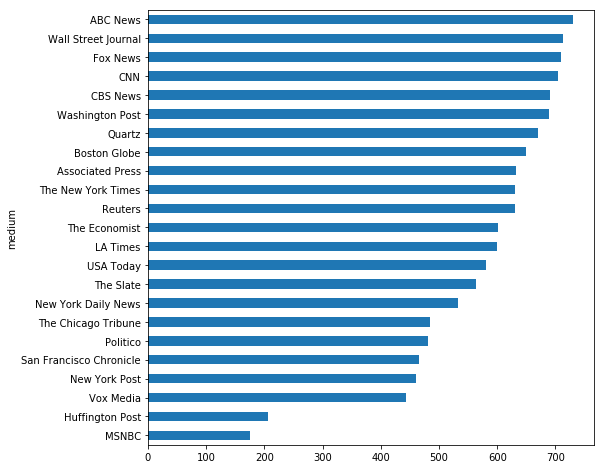

In [392]:
tweets.groupby('medium')['medium'].count().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))

#### Who got the most retweets, likes and shares

In [393]:
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc
8,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,1502787000000,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc
9,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,1502788740000,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc


In [36]:
tweets['tweet_interactions'] = tweets.likes + tweets.replies + tweets.retweets
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123
8,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,1502787000000,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,1461
9,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,1502788740000,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,1685


In [395]:
tweets.groupby('medium')['tweet_interactions'].sum().sort_values(ascending=True)

medium
San Francisco Chronicle       4451
Quartz                       19107
The Chicago Tribune          24282
New York Post                43436
Boston Globe                 52645
New York Daily News          53350
The Slate                    64279
Vox Media                    92893
LA Times                    105527
Reuters                     113913
Huffington Post             127285
USA Today                   128237
Wall Street Journal         132749
Politico                    149795
MSNBC                       151952
CBS News                    239879
The Economist               286740
Associated Press            394224
Washington Post             540867
The New York Times          609150
ABC News                    814935
CNN                         995983
Fox News                   1219144
Name: tweet_interactions, dtype: int64

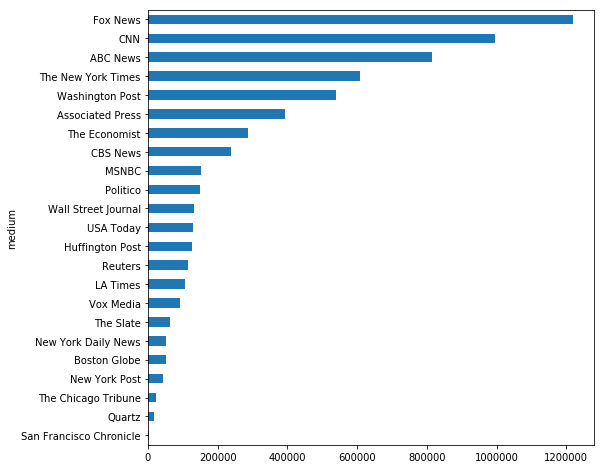

In [396]:
tweets.groupby('medium')['tweet_interactions'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))

#### Who got the most retweets, likes and shares (normalized per 100 tweets)

In [37]:
tweet_interactions_normalized = pd.DataFrame({'tweets_totals':tweets.groupby('medium')['medium'].count(),\
                                              'tweets_interactions_total':tweets.groupby('medium')['tweet_interactions'].sum(),\
                                             'tweets_interactions_normalized':(tweets.groupby('medium')['tweet_interactions'].sum()/tweets.groupby('medium')['medium'].count())*100})
tweet_interactions_normalized.sort_values(by='tweets_interactions_normalized', ascending=True)

,tweets_interactions_normalized,tweets_interactions_total,tweets_totals
medium,,,
San Francisco Chronicle,955.150215,4451,466
Quartz,2851.791045,19107,670
The Chicago Tribune,5006.597938,24282,485
Boston Globe,8111.710324,52645,649
New York Post,9422.125813,43436,461
New York Daily News,10009.380863,53350,533
The Slate,11396.985816,64279,564
LA Times,17587.833333,105527,600
Reuters,18081.428571,113913,630


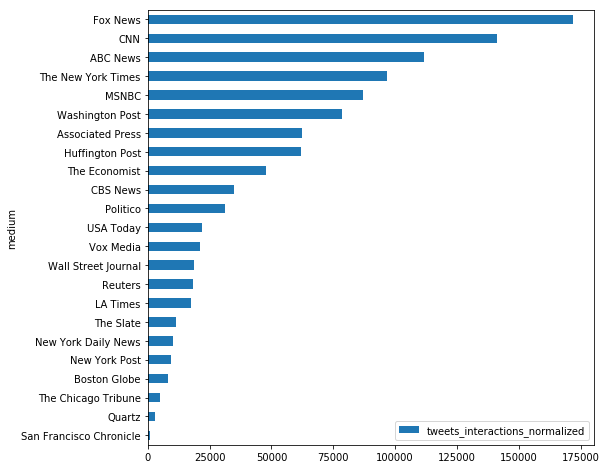

In [398]:
tweet_interactions_normalized.sort_values(by='tweets_interactions_normalized', ascending=True).plot(kind='barh', y='tweets_interactions_normalized', figsize=(8,8))

#### Keep only tweets with bitlys
- tweet_bitly.isnull() -> from 13,044 to 12,101  
- tweet_bitly_length -> from 12,101 to 8,742  
- tweet_bitly_contains_web_url -> from 8,742 to 8,674

In [399]:
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123
8,992,ABC News,141,328,None,8:50 AM - 15 Aug 2017,1502787000000,897485678891728896,https://twitter.com/ABC/status/897485678891728897,"NEW: Scott Paul, part of Pres. Trump's America...",1502812234000,http://twitter.com/abc,1461
9,1324,ABC News,43,318,None,9:19 AM - 15 Aug 2017,1502788740000,897492932315447296,https://twitter.com/ABC/status/897492932315447296,Tim Tebow records a greeting for a grandma rec...,1502813964000,http://twitter.com/abc,1685


In [38]:
tweets = tweets[~tweets.tweet_bitly.isnull()]
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123
10,875,ABC News,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc,1290
11,703,ABC News,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc,1070


In [39]:
def tweet_bitly_length(row):
    if len(row['tweet_bitly']) > 22:
        return ''
    else:
        return row['tweet_bitly']
    
tweets['tweet_bitly'] = tweets.apply(tweet_bitly_length, axis=1)
tweets

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123
10,875,ABC News,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc,1290
11,703,ABC News,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc,1070


In [40]:
tweets = tweets[tweets.tweet_bitly != '']
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123
10,875,ABC News,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc,1290
11,703,ABC News,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc,1070


In [421]:
tweets[tweets.medium=='Wall Street Journal']

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions
11647,526,Wall Street Journal,141,331,http://www.wsj.com,9:30 PM - 15 Aug 2017,1502832600000,897676817645154304,https://twitter.com/WSJ/status/897676817645154308,Take an early look at the front page of The Wa...,1502857806000,https://twitter.com/wsj,998
11668,94,Wall Street Journal,40,54,http://www.wsj.com,2:30 AM - 16 Aug 2017,1502850600000,897752345018347520,https://twitter.com/WSJ/status/897752345018347521,Take an early look at the front page of The Wa...,1502875813000,https://twitter.com/wsj,188
11795,350,Wall Street Journal,29,175,http://www.wsj.com,9:45 PM - 16 Aug 2017,1502919900000,898042985274847232,https://twitter.com/WSJ/status/898042985274847232,Take an early look at the front page of The Wa...,1502945107000,https://twitter.com/wsj,554
11818,75,Wall Street Journal,9,34,http://www.wsj.com,2:30 AM - 17 Aug 2017,1502937000000,898114776374685696,https://twitter.com/WSJ/status/898114776374685696,Take an early look at the front page of The Wa...,1502962223000,https://twitter.com/wsj,118
11948,39,Wall Street Journal,6,32,http://www.wsj.com,10:00 PM - 17 Aug 2017,1503007200000,898409164677959680,https://twitter.com/WSJ/status/898409164677959681,Take an early look at the front page of The Wa...,1503032411000,https://twitter.com/wsj,77
11972,34,Wall Street Journal,2,26,http://www.wsj.com,2:30 AM - 18 Aug 2017,1503023400000,898477114910846976,https://twitter.com/WSJ/status/898477114910846976,Take an early look at the front page of The Wa...,1503048611000,https://twitter.com/wsj,62
12204,56,Wall Street Journal,6,48,http://www.wsj.com,9:30 PM - 20 Aug 2017,1503264600000,899488765646974976,https://twitter.com/WSJ/status/899488765646974976,Take an early look at the front page of The Wa...,1503289808000,https://twitter.com/wsj,110
12347,74,Wall Street Journal,3,47,http://www.wsj.com,10:00 PM - 21 Aug 2017,1503352800000,899858745177640960,https://twitter.com/WSJ/status/899858745177640960,Take an early look at the front page of The Wa...,1503378018000,https://twitter.com/wsj,124


In [41]:
medium_web_urls = []
for i,k in zip(twitter_handles.medium.unique().tolist(), twitter_handles.web_url.unique().tolist()):
    medium_web_urls.append({'medium':i, 'web_url':k})

medium_web_urls

[{'medium': 'The New York Times', 'web_url': 'nytimes.com'},
 {'medium': 'Washington Post', 'web_url': 'washingtonpost.com'},
 {'medium': 'USA Today', 'web_url': 'usatoday.com'},
 {'medium': 'Wall Street Journal', 'web_url': 'wsj.com'},
 {'medium': 'LA Times', 'web_url': 'latimes.com'},
 {'medium': 'New York Daily News', 'web_url': 'nydailynews.com'},
 {'medium': 'New York Post', 'web_url': 'nypost.com'},
 {'medium': 'Boston Globe', 'web_url': 'bostonglobe.com'},
 {'medium': 'San Francisco Chronicle', 'web_url': 'sfchronicle.com'},
 {'medium': 'The Chicago Tribune', 'web_url': 'chicagotribune.com'},
 {'medium': 'MSNBC', 'web_url': 'msnbc.com'},
 {'medium': 'CNN', 'web_url': 'cnn.com'},
 {'medium': 'ABC News', 'web_url': 'abcnews.com'},
 {'medium': 'Fox News', 'web_url': 'foxnews.com'},
 {'medium': 'CBS News', 'web_url': 'cbsnews.com'},
 {'medium': 'Reuters', 'web_url': 'reuters.com'},
 {'medium': 'Associated Press', 'web_url': 'ap.org'},
 {'medium': 'Huffington Post', 'web_url': 'huffp

In [42]:
def create_medium_web_url(row):
    for i in medium_web_urls:
        if row['medium'] == i['medium']:
            return i['web_url']
    
tweets['medium_web_url'] = tweets.apply(create_medium_web_url, axis=1)
tweets

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions,medium_web_url
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188,abcnews.com
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159,abcnews.com
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88,abcnews.com
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391,abcnews.com
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220,abcnews.com
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001,abcnews.com
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366,abcnews.com
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123,abcnews.com
10,875,ABC News,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc,1290,abcnews.com
11,703,ABC News,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc,1070,abcnews.com


In [43]:
def tweet_bitly_contains_web_url(row):
    if row['medium_web_url'] in (row['tweet_bitly']):
        return ''
    else:
        return row['tweet_bitly']
    
tweets['tweet_bitly'] = tweets.apply(tweet_bitly_contains_web_url, axis=1)
tweets

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions,medium_web_url
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188,abcnews.com
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159,abcnews.com
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88,abcnews.com
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391,abcnews.com
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220,abcnews.com
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001,abcnews.com
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366,abcnews.com
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123,abcnews.com
10,875,ABC News,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc,1290,abcnews.com
11,703,ABC News,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc,1070,abcnews.com


In [44]:
tweets = tweets[tweets.tweet_bitly != '']
tweets

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions,medium_web_url
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc,188,abcnews.com
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc,159,abcnews.com
2,39,ABC News,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc,88,abcnews.com
3,169,ABC News,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc,391,abcnews.com
4,115,ABC News,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc,220,abcnews.com
5,991,ABC News,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc,2001,abcnews.com
6,234,ABC News,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc,366,abcnews.com
7,47,ABC News,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc,123,abcnews.com
10,875,ABC News,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc,1290,abcnews.com
11,703,ABC News,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc,1070,abcnews.com


In [426]:
tweets[tweets.medium=='MSNBC']

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle,tweet_interactions,medium_web_url
4922,1346,MSNBC,543,1339,http://snpy.tv/2fIbR7v,4:43 AM - 15 Aug 2017,1502772180000,897423538763649024,https://twitter.com/MSNBC/status/8974235387636...,"In AM tweetstorm, Trump re-tweets — then delet...",1502797419000,http://twitter.com/msnbc,3228,msnbc.com
4961,159,MSNBC,268,98,http://snpy.tv/2vEbY9G,11:08 AM - 16 Aug 2017,1502881680000,897882867690127360,https://twitter.com/MSNBC/status/8978828676901...,WATCH: Trump Departs Trump Tower for New Jerse...,1502906932000,http://twitter.com/msnbc,525,msnbc.com
4963,609,MSNBC,77,258,http://snpy.tv/2uJVuhv,11:31 AM - 16 Aug 2017,1502883060000,897888666856546304,https://twitter.com/MSNBC/status/8978886668565...,"After Charlottesville, Fmr. Sec. of State Made...",1502908314000,http://twitter.com/msnbc,944,msnbc.com
4982,789,MSNBC,239,312,http://snpy.tv/2i9IQT0,6:08 AM - 17 Aug 2017,1502950080000,898169601195888640,https://twitter.com/MSNBC/status/8981696011958...,"""For the sake of our Nation .. fix this"": Sen....",1502975294000,http://twitter.com/msnbc,1340,msnbc.com
4987,93,MSNBC,330,87,http://snpy.tv/2fPuXsx,8:30 AM - 17 Aug 2017,1502958600000,898205402638241792,https://twitter.com/MSNBC/status/8982054026382...,"BREAKING: Spanish Police say ""massive"" van cra...",1502983830000,http://twitter.com/msnbc,510,msnbc.com
4988,62,MSNBC,35,40,http://bit.ly/2uLpmdc,9:00 AM - 17 Aug 2017,1502960400000,898212885570215936,https://twitter.com/MSNBC/status/8982128855702...,WATCH LIVE: Barcelona police report multiple i...,1502985614000,http://twitter.com/msnbc,137,msnbc.com
4990,94,MSNBC,51,128,http://snpy.tv/2wU3CJM,9:54 AM - 17 Aug 2017,1502963640000,898226428067454976,https://twitter.com/MSNBC/status/8982264280674...,"Just In: Barcelona police confirm ""terror atta...",1502988843000,http://twitter.com/msnbc,273,msnbc.com
4993,99,MSNBC,20,78,http://snpy.tv/2vHgFj7,11:14 AM - 17 Aug 2017,1502968440000,898246724824686592,https://twitter.com/MSNBC/status/8982467248246...,"Barcelona police: One person in custody, treat...",1502993682000,http://twitter.com/msnbc,197,msnbc.com
4994,153,MSNBC,58,250,http://snpy.tv/2vHbHCY,11:25 AM - 17 Aug 2017,1502969100000,898249445371858944,https://twitter.com/MSNBC/status/8982494453718...,BREAKING: Barcelona police confirm 13 people d...,1502994331000,http://twitter.com/msnbc,461,msnbc.com
5011,294,MSNBC,158,46,http://bit.ly/2uXUQZI,7:13 AM - 18 Aug 2017,1503040380000,898548419832160256,https://twitter.com/MSNBCPR/status/89854841983...,".@Morning_Joe turns 10 in September! ""The most...",1503065612000,http://twitter.com/msnbc,498,msnbc.com


In [45]:
tweets.to_json('Media-Tweets-All_v03-Tweets-With-Bitlys-Only.json', orient='records')

In [46]:
tweets = pd.read_json('Media-Tweets-All_v03-Tweets-With-Bitlys-Only.json')
tweets

,likes,medium,medium_web_url,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_interactions,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,abcnews.com,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,188,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,abcnews.com,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,159,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc
2,39,ABC News,abcnews.com,8,41,http://abcn.ws/2w9L4XG,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,88,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc
3,169,ABC News,abcnews.com,44,178,http://abcn.ws/2vFq4Wz,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,391,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc
4,115,ABC News,abcnews.com,36,69,http://abcn.ws/2uEQlY5,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,220,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc
5,991,ABC News,abcnews.com,688,322,http://abcn.ws/2vYdjsX,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,2001,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc
6,234,ABC News,abcnews.com,12,120,http://abcn.ws/2vXCMTg,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,366,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc
7,47,ABC News,abcnews.com,32,44,http://abcn.ws/2uEESHY,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,123,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc
8,875,ABC News,abcnews.com,172,243,http://abcn.ws/2uFtLyd,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,1290,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc
9,703,ABC News,abcnews.com,97,270,http://abcn.ws/2uLyGKa,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,1070,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc


### Who's tweeting most tweets with bitlys

In [47]:
tweets.groupby('medium')['tweet_bitly'].count().sort_values(ascending=True).tail(-4)

medium
Vox Media              229
Fox News               279
New York Post          461
The Chicago Tribune    467
New York Daily News    508
Associated Press       537
The Economist          565
ABC News               589
Boston Globe           594
CBS News               596
LA Times               597
Quartz                 609
Reuters                619
The New York Times     626
Washington Post        675
CNN                    683
Name: tweet_bitly, dtype: int64

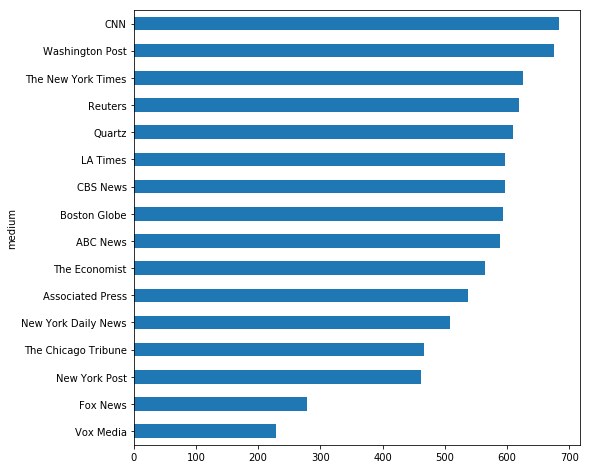

In [48]:
tweets.groupby('medium')['tweet_bitly'].count().sort_values(ascending=True).tail(-4).plot(kind='barh', figsize=(8,8))

### Who's tweeting most tweets with bitlys -normalized per 100 tweets

In [49]:
all_original_tweets = pd.read_json('Media-Tweets-All_v02-No-Duplis-Original-Tweets-Only.json')
all_original_tweets.head(2)

,likes,medium,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc


In [2]:
tweets_with_bitlys = pd.read_json('Media-Tweets-All_v03-Tweets-With-Bitlys-Only.json')
tweets_with_bitlys.head(2)

,likes,medium,medium_web_url,replies,retweets,tweet_bitly,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_interactions,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,abcnews.com,7,78,http://abcn.ws/2w9XxLd,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,188,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,abcnews.com,11,69,http://abcn.ws/2uKwXor,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,159,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc


In [51]:
tweet_bitlys_normalized = pd.DataFrame({'total_tweets':all_original_tweets.groupby('medium')['medium'].count(), 'tweets_with_bitlys':tweets_with_bitlys.groupby('medium')['medium'].count()})
tweet_bitlys_normalized['tweets_with_bitlys_normalized'] = (tweet_bitlys_normalized['tweets_with_bitlys']/tweet_bitlys_normalized['total_tweets'])*100
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200]

,total_tweets,tweets_with_bitlys,tweets_with_bitlys_normalized
ABC News,730,589.0,80.684932
Associated Press,633,537.0,84.834123
Boston Globe,649,594.0,91.525424
CBS News,690,596.0,86.376812
CNN,705,683.0,96.879433
Fox News,709,279.0,39.351199
LA Times,600,597.0,99.500000
New York Daily News,533,508.0,95.309568
New York Post,461,461.0,100.000000
Quartz,670,609.0,90.895522


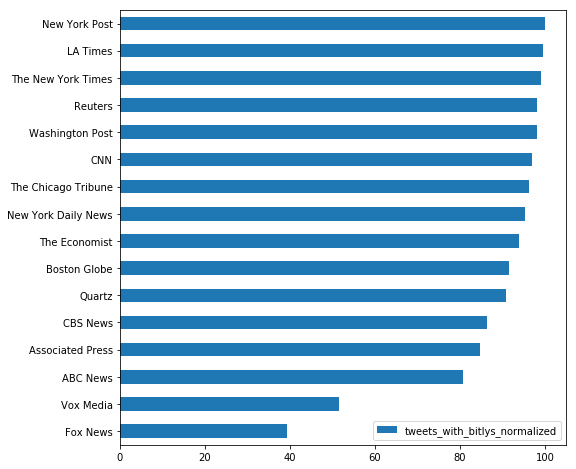

In [52]:
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200].sort_values(by='tweets_with_bitlys_normalized', ascending=True).plot(kind='barh', y='tweets_with_bitlys_normalized', figsize=(8,8))

# After bitly data mining JSON

In [20]:
tweets_with_bitlys.to_json('Media-Tweets-All_v04-Tweets-With-Bitlys-Clicks.json', orient='records')

In [21]:
tweets_with_bitlys = pd.read_json('Media-Tweets-All_v04-Tweets-With-Bitlys-Clicks.json')
tweets_with_bitlys

,likes,medium,medium_web_url,replies,retweets,tweet_bitly,tweet_bitly_clicks_from_Twitter,tweet_bitly_clicks_total,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_interactions,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,abcnews.com,7,78,http://abcn.ws/2w9XxLd,61,138,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,188,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,abcnews.com,11,69,http://abcn.ws/2uKwXor,31,75,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,159,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc
2,39,ABC News,abcnews.com,8,41,http://abcn.ws/2w9L4XG,24,64,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,88,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc
3,169,ABC News,abcnews.com,44,178,http://abcn.ws/2vFq4Wz,158,230,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,391,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc
4,115,ABC News,abcnews.com,36,69,http://abcn.ws/2uEQlY5,92,134,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,220,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc
5,991,ABC News,abcnews.com,688,322,http://abcn.ws/2vYdjsX,151,676,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,2001,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc
6,234,ABC News,abcnews.com,12,120,http://abcn.ws/2vXCMTg,55,203,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,366,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc
7,47,ABC News,abcnews.com,32,44,http://abcn.ws/2uEESHY,27,51,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,123,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc
8,875,ABC News,abcnews.com,172,243,http://abcn.ws/2uFtLyd,250,434,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,1290,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc
9,703,ABC News,abcnews.com,97,270,http://abcn.ws/2uLyGKa,443,596,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,1070,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc


#### Who has the most tweets with bitlys

In [37]:
tweets_with_bitlys = tweets_with_bitlys[tweets_with_bitlys.tweet_bitly_clicks_from_Twitter != 'not a bitly']
tweets_with_bitlys

,likes,medium,medium_web_url,replies,retweets,tweet_bitly,tweet_bitly_clicks_from_Twitter,tweet_bitly_clicks_total,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_interactions,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
0,103,ABC News,abcnews.com,7,78,http://abcn.ws/2w9XxLd,61,138,6:38 AM - 15 Aug 2017,1502779080000,897452488365920256,188,https://twitter.com/ABC/status/897452488365920256,"""I felt like the monster was chasing us"": Woma...",1502804321000,http://twitter.com/abc
1,79,ABC News,abcnews.com,11,69,http://abcn.ws/2uKwXor,31,75,6:58 AM - 15 Aug 2017,1502780280000,897457427716726784,159,https://twitter.com/ABC/status/897457427716726785,Death toll in flooding and landslides in South...,1502805499000,http://twitter.com/abc
2,39,ABC News,abcnews.com,8,41,http://abcn.ws/2w9L4XG,24,64,7:15 AM - 15 Aug 2017,1502781300000,897461743324188672,88,https://twitter.com/ABC/status/897461743324188674,UK probe into Grenfell fire will sidestep wide...,1502806528000,http://twitter.com/abc
3,169,ABC News,abcnews.com,44,178,http://abcn.ws/2vFq4Wz,158,230,7:37 AM - 15 Aug 2017,1502782620000,897467286101032960,391,https://twitter.com/ABC/status/897467286101032965,4 people injured after massive tree falls down...,1502807849000,http://twitter.com/abc
4,115,ABC News,abcnews.com,36,69,http://abcn.ws/2uEQlY5,92,134,7:54 AM - 15 Aug 2017,1502783640000,897471668012158976,220,https://twitter.com/ABC/status/897471668012158976,GOP voters head to polls to replace Rep. Chaff...,1502808894000,http://twitter.com/abc
5,991,ABC News,abcnews.com,688,322,http://abcn.ws/2vYdjsX,151,676,8:05 AM - 15 Aug 2017,1502784300000,897474279385821184,2001,https://twitter.com/ABC/status/897474279385821184,Protesters who pulled down a Confederate statu...,1502809517000,http://twitter.com/abc
6,234,ABC News,abcnews.com,12,120,http://abcn.ws/2vXCMTg,55,203,8:25 AM - 15 Aug 2017,1502785500000,897479391957200896,366,https://twitter.com/ABC/status/897479391957200896,U.S. Marines take part in parachute drop drill...,1502810736000,http://twitter.com/abc
7,47,ABC News,abcnews.com,32,44,http://abcn.ws/2uEESHY,27,51,8:49 AM - 15 Aug 2017,1502786940000,897485349810819072,123,https://twitter.com/ABC/status/897485349810819073,Today's AL Senate race has pitted Republican a...,1502812156000,http://twitter.com/abc
8,875,ABC News,abcnews.com,172,243,http://abcn.ws/2uFtLyd,250,434,9:39 AM - 15 Aug 2017,1502789940000,897497977262034944,1290,https://twitter.com/ABC/status/897497977262034944,Three CEOs quit Trump's manufacturing council ...,1502815167000,http://twitter.com/abc
9,703,ABC News,abcnews.com,97,270,http://abcn.ws/2uLyGKa,443,596,9:47 AM - 15 Aug 2017,1502790420000,897499905656184832,1070,https://twitter.com/ABC/status/897499905656184832,UPDATE: Four CEOs quit Pres. Trump's manufactu...,1502815626000,http://twitter.com/abc


In [39]:
tweets_with_bitlys.groupby('medium')['tweet_bitly'].count().sort_values(ascending=True).tail(-5)

medium
Vox Media              227
Fox News               278
New York Post          461
The Chicago Tribune    462
New York Daily News    507
The Economist          565
ABC News               588
LA Times               595
CBS News               596
Quartz                 597
Reuters                619
The New York Times     626
CNN                    665
Washington Post        675
Name: tweet_bitly, dtype: int64

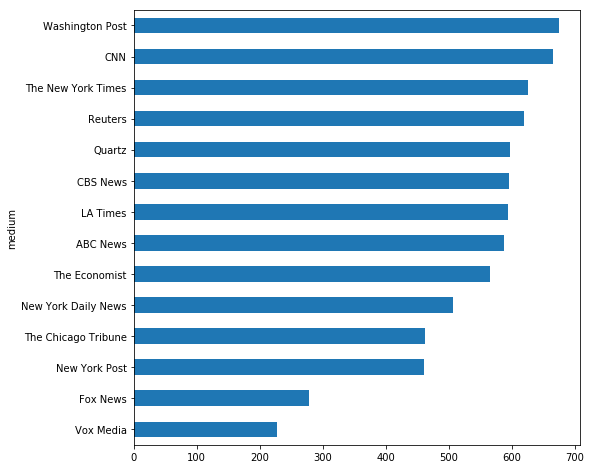

In [40]:
tweets_with_bitlys.groupby('medium')['tweet_bitly'].count().sort_values(ascending=True).tail(-5).plot(kind='barh', figsize=(8,8))

### Who's tweeting most tweets with bitlys -normalized per 100 tweets

In [41]:
all_original_tweets = pd.read_json('Media-Tweets-All_v02-No-Duplis-Original-Tweets-Only.json')

In [42]:
tweet_bitlys_normalized = pd.DataFrame({'total_tweets':all_original_tweets.groupby('medium')['medium'].count(), 'tweets_with_bitlys':tweets_with_bitlys.groupby('medium')['medium'].count()})
tweet_bitlys_normalized['tweets_with_bitlys_normalized'] = (tweet_bitlys_normalized['tweets_with_bitlys']/tweet_bitlys_normalized['total_tweets'])*100
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200]

,total_tweets,tweets_with_bitlys,tweets_with_bitlys_normalized
ABC News,730,588.0,80.547945
CBS News,690,596.0,86.376812
CNN,705,665.0,94.326241
Fox News,709,278.0,39.210155
LA Times,600,595.0,99.166667
New York Daily News,533,507.0,95.121951
New York Post,461,461.0,100.000000
Quartz,670,597.0,89.104478
Reuters,630,619.0,98.253968
The Chicago Tribune,485,462.0,95.257732


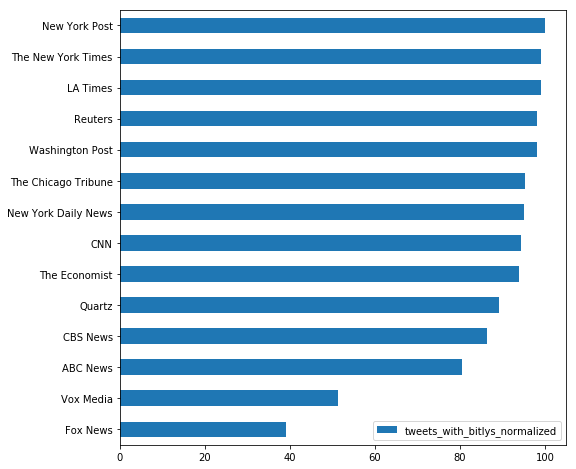

In [43]:
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200].sort_values(by='tweets_with_bitlys_normalized', ascending=True).plot(kind='barh', y='tweets_with_bitlys_normalized', figsize=(8,8))

### Who got the most clicks on their bitlys - links from Twitter

In [53]:
tweets_with_bitlys['tweet_bitly_clicks_from_Twitter'] = tweets_with_bitlys['tweet_bitly_clicks_from_Twitter'].astype(float)
tweet_bitlys_normalized['total_bitly_clicks'] = tweets_with_bitlys.groupby('medium')['tweet_bitly_clicks_from_Twitter'].sum()
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200]

,total_tweets,tweets_with_bitlys,tweets_with_bitlys_normalized,total_bitly_clicks
ABC News,730,588.0,80.547945,354500.0
CBS News,690,596.0,86.376812,479680.0
CNN,705,665.0,94.326241,367799.0
Fox News,709,278.0,39.210155,200553.0
LA Times,600,595.0,99.166667,151249.0
New York Daily News,533,507.0,95.121951,33744.0
New York Post,461,461.0,100.000000,80326.0
Quartz,670,597.0,89.104478,67897.0
Reuters,630,619.0,98.253968,84725.0
The Chicago Tribune,485,462.0,95.257732,39670.0


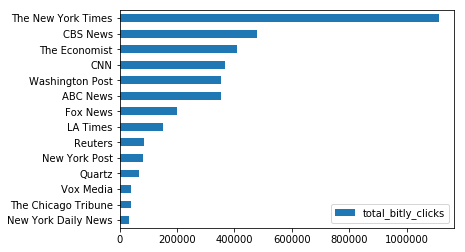

In [55]:
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200].sort_values(by='total_bitly_clicks', ascending=True).plot(kind='barh', y='total_bitly_clicks')

### Who got the most clicks on their bitlys - links from Twitter - normalized per 100 Tweets with bitlys

In [56]:
tweet_bitlys_normalized['total_bitly_clicks_normalized'] = (tweet_bitlys_normalized['total_bitly_clicks']/tweet_bitlys_normalized['tweets_with_bitlys'])*100
tweet_bitlys_normalized

,total_tweets,tweets_with_bitlys,tweets_with_bitlys_normalized,total_bitly_clicks,total_bitly_clicks_normalized
ABC News,730,588.0,80.547945,354500.0,60289.115646
Associated Press,633,4.0,0.631912,2526.0,63150.000000
Boston Globe,649,6.0,0.924499,763.0,12716.666667
CBS News,690,596.0,86.376812,479680.0,80483.221477
CNN,705,665.0,94.326241,367799.0,55308.120301
Fox News,709,278.0,39.210155,200553.0,72141.366906
Huffington Post,206,NaN,NaN,NaN,NaN
LA Times,600,595.0,99.166667,151249.0,25420.000000
MSNBC,175,21.0,12.000000,1962.0,9342.857143
New York Daily News,533,507.0,95.121951,33744.0,6655.621302


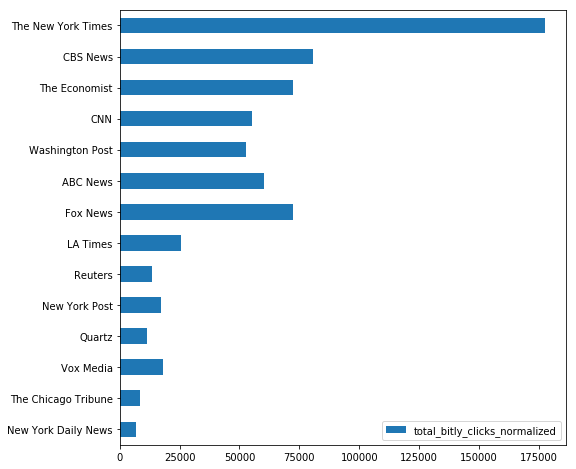

In [57]:
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200].sort_values(by='total_bitly_clicks', ascending=True).plot(kind='barh', y='total_bitly_clicks_normalized',figsize=(8,8))

### Scatter // tweets_with_bitlys_normalized and bitly_clicks_normalized

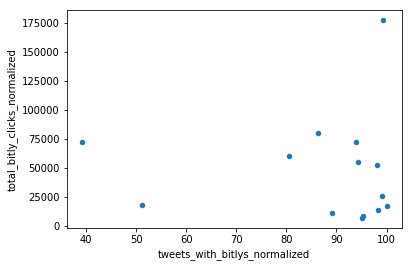

In [63]:
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200].plot(kind='scatter', x='tweets_with_bitlys_normalized', y='total_bitly_clicks_normalized')

### Scatter // interactions_normalized and clicks_normalized

In [66]:
tweet_bitlys_normalized['total_interactions'] = tweets_with_bitlys.groupby('medium')['tweet_interactions'].sum()
tweet_bitlys_normalized['total_interactions_normalized'] = (tweet_bitlys_normalized['total_interactions']/tweet_bitlys_normalized['tweets_with_bitlys'])*100
tweet_bitlys_normalized

,total_tweets,tweets_with_bitlys,tweets_with_bitlys_normalized,total_bitly_clicks,total_bitly_clicks_normalized,total_interactions,total_interactions_normalized
ABC News,730,588.0,80.547945,354500.0,60289.115646,532504.0,90561.904762
Associated Press,633,4.0,0.631912,2526.0,63150.000000,294.0,7350.000000
Boston Globe,649,6.0,0.924499,763.0,12716.666667,387.0,6450.000000
CBS News,690,596.0,86.376812,479680.0,80483.221477,179907.0,30185.738255
CNN,705,665.0,94.326241,367799.0,55308.120301,946539.0,142336.691729
Fox News,709,278.0,39.210155,200553.0,72141.366906,346547.0,124657.194245
Huffington Post,206,NaN,NaN,NaN,NaN,NaN,NaN
LA Times,600,595.0,99.166667,151249.0,25420.000000,104871.0,17625.378151
MSNBC,175,21.0,12.000000,1962.0,9342.857143,16865.0,80309.523810
New York Daily News,533,507.0,95.121951,33744.0,6655.621302,50369.0,9934.714004


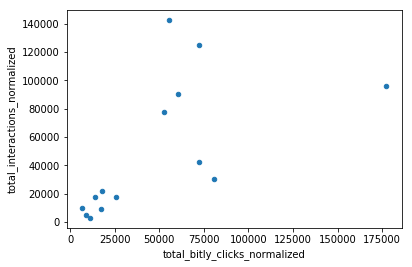

In [68]:
tweet_bitlys_normalized[tweet_bitlys_normalized['tweets_with_bitlys'] > 200].plot(kind='scatter', x='total_bitly_clicks_normalized', y='total_interactions_normalized')

### Top-10 Tweets with the most bitly clicks on Twitter

In [62]:
tweets_with_bitlys.drop_duplicates(subset='tweet_bitly', keep='first').sort_values(by='tweet_bitly_clicks_from_Twitter', ascending=False).head(10)

,likes,medium,medium_web_url,replies,retweets,tweet_bitly,tweet_bitly_clicks_from_Twitter,tweet_bitly_clicks_total,tweet_datetime,tweet_datetime_from_datetime,tweet_id,tweet_interactions,tweet_permalink,tweet_text,tweet_unixtime,twitter_handle
1765,44,CBS News,cbsnews.com,32,34,http://cbsn.ws/1UJwwDb,79044.0,122427,12:18 PM - 16 Aug 2017,1502885880000,897900482211049472,110,https://twitter.com/CBSNews/status/89790048221...,WATCH LIVE: Attorney General Jeff Sessions del...,1502911131000,http://twitter.com/cbsnews
6736,32196,The Economist,economist.com,1558,19401,http://econ.st/2uSSrj0,70228.0,77244,4:02 AM - 17 Aug 2017,1502942520000,898138032058114048,53155,https://twitter.com/TheEconomist/status/898138...,"Donald Trump is politically inept, morally bar...",1502967768000,http://twitter.com/theeconomist
1755,187,CBS News,cbsnews.com,204,87,http://cbsn.ws/2k2WwLh,46091.0,77653,10:03 AM - 16 Aug 2017,1502877780000,897866399284174848,478,https://twitter.com/CBSNews/status/89786639928...,"We're praying ""that in America that we will no...",1502903005000,http://twitter.com/cbsnews
7397,6796,The New York Times,nytimes.com,997,5422,http://nyti.ms/2wohKwR,25289.0,31420,9:42 AM - 18 Aug 2017,1503049320000,898585843664691200,13215,https://twitter.com/nytimes/status/89858584366...,Breaking News: President Trump told aides he’s...,1503074534000,http://twitter.com/nytimes
14,319,ABC News,abcnews.com,206,559,http://abcn.ws/2jkcemm,22800.0,42391,11:37 AM - 15 Aug 2017,1502797020000,897527675912298496,1084,https://twitter.com/ABC/status/897527675912298496,Lincoln Memorial defaced with graffiti overnig...,1502822247000,http://twitter.com/abc
7336,11347,The New York Times,nytimes.com,1029,5120,http://nyti.ms/2uMItDy,22286.0,26304,12:25 PM - 17 Aug 2017,1502972700000,898264612352733184,17496,https://twitter.com/nytimes/status/89826461235...,Opinion: It's now clear that my optimism was u...,1502997947000,http://twitter.com/nytimes
19,48,ABC News,abcnews.com,39,32,http://abcn.ws/2mZX3yM,21964.0,30888,12:59 PM - 15 Aug 2017,1502801940000,897548270427353088,119,https://twitter.com/ABC/status/897548270427353088,LIVE NOW: Pres. Trump makes a statement after ...,1502827157000,http://twitter.com/abc
7137,901,The New York Times,nytimes.com,83,429,http://nyti.ms/2w0vldU,17204.0,18403,7:47 PM - 15 Aug 2017,1502826420000,897650890961768448,1413,https://twitter.com/nytimes/status/89765089096...,"""Wow"": Stunned TV hosts reacted in real time t...",1502851624000,http://twitter.com/nytimes
7360,1286,The New York Times,nytimes.com,37,705,http://nyti.ms/2uWt8fM,16582.0,18288,1:30 AM - 18 Aug 2017,1503019800000,898461998882607104,2028,https://twitter.com/nytimes/status/89846199888...,Opinion: Residents in a German town turned a n...,1503045007000,http://twitter.com/nytimes
6748,7066,The Economist,economist.com,416,3996,http://econ.st/2wiGN4B,13833.0,15523,7:27 AM - 17 Aug 2017,1502954820000,898189554276020224,11478,https://twitter.com/TheEconomist/status/898189...,"Donald Trump is politically inept, morally bar...",1502980051000,http://twitter.com/theeconomist
